In [2]:
from mmdet.datasets import build_dataset

In [3]:
from mmdet.datasets import VOCDataset

In [11]:
data_root = 'data/VOCdevkit/'
ann_file = data_root + 'VOC2007/ImageSets/Main/test.txt'
img_prefix = data_root + 'VOC2007/'
img_scale = (1152, 1200)
img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
voc_dataset = VOCDataset(ann_file=ann_file, img_prefix=img_prefix, img_scale=img_scale, img_norm_cfg=img_norm_cfg)

In [12]:
img_infos = voc_dataset.load_annotations(ann_file)

In [13]:
len(img_infos)

4919

In [14]:
# Get distribution of bounding box
# 2,  4,  8, 16, 32, 64, 128
box_sizes = []
for i in range(len(img_infos)):
    ann = voc_dataset.get_ann_info(i)
    for bbox in ann['bboxes']:
        box_sizes.append(max(bbox[2] - bbox[0], bbox[3] - bbox[1]))

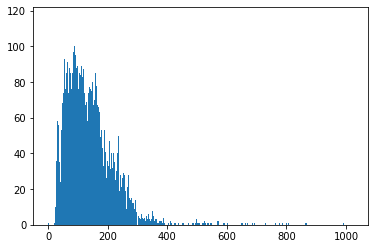

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
box_sizes = np.array(box_sizes)
plt.hist(box_sizes, bins = range(1024))
plt.show()

In [17]:
len(box_sizes)

15231

In [19]:
scales = [0,16, 32, 64, 128,256,512,1024,1e8]
for i in range(len(scales) - 1):
    num = np.sum((box_sizes > scales[i]) & (box_sizes < scales[i+1]))
    ratio = num/len(box_sizes)
    print('length {} ~ {} : {}/{}'.format(scales[i], scales[i+1], ratio, num))

length 0 ~ 16 : 0.00013131114175037753/2
length 16 ~ 32 : 0.018186593132427285/277
length 32 ~ 64 : 0.13722014312914452/2090
length 64 ~ 128 : 0.34777755892587486/5297
length 128 ~ 256 : 0.41395837436806515/6305
length 256 ~ 512 : 0.058564769220668375/892
length 512 ~ 1024 : 0.00794432407589784/121
length 1024 ~ 100000000.0 : 0.0005909001378766989/9


In [18]:
min(box_sizes)

0.0